# Data analysis and modeling on dataset 1

## Data preparation

First we import all the libraries we plan on using at this point in time:

In [10]:
# import pandas for structuring the data
import pandas as pd
import pandas_profiling

# import numpy for numerical analysis
import numpy as np

# import libs for diagrams inline with the text
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# other utilities
from sklearn import datasets, preprocessing, metrics, tree
from sklearn.model_selection import train_test_split
import sklearn.ensemble as ske

Then we load our dataset into the notebook and print out the shape and the first five entries:

In [2]:
df = pd.read_csv('datasets/heart.csv')
print(df.shape)
df.head()

(1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


We then run df.describe() to give an overview of the data:

In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


We check if our data contains any null and n/a values we need to be aware of:

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

We would like to see the datatypes we have in our dataframe:

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

From this it looks like we won't have to do any converting of datatypes, since everything is numerical.

# TODO: look for outliers, and maybe do standardization

Below I will generate a pandas_profiling document that contains useful graphs and algoritms used on our data.

In [11]:
pandas_profiling.ProfileReport(df).to_file("dataset1_profiling.html")

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

From the results in this above profile report, we'll extract the highlights.

First off, we will take a look at the correlation heatmap of our data using the "Pearson's r" to look at any linear correlations between the different parameters:

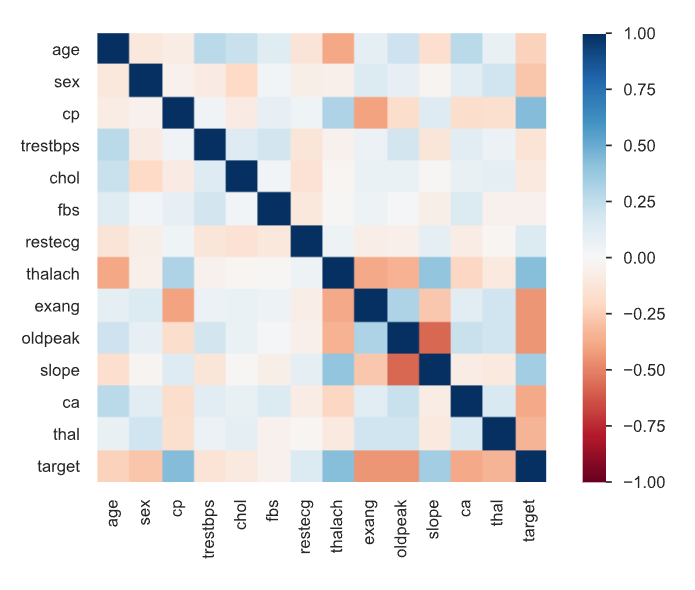

Based on this heatmap, we get an overview image of the different degrees of linear correlations. To quantify these correlations we can get the correlations with pandas:

In [41]:
corr = df.corr(method="pearson")
cmap = sns.cm.vlag_r
corr.style.background_gradient(cmap=cmap)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


Here is a numeric overview of the different correlations. From this we can get a sense of which values have the highest either positive or negative correlation with "target" which is whether or not a person has a heart disease. We would like to take a closer look at the most noticable values.

#### "cp" - Chest pain type 
With a correlation coefficient of 0.435

In [45]:
chestPain = df.groupby('cp').mean()
chestPain

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
cp,,,,,,,,,,,,,
0,55.784708,0.732394,132.213280,249.993964,0.132797,0.480885,140.052314,0.569416,1.438833,1.243461,0.981891,2.454728,0.245473
1,51.245509,0.658683,128.119760,244.700599,0.095808,0.616766,162.179641,0.071856,0.323952,1.658683,0.425150,2.155689,0.802395
2,53.517606,0.616197,130.077465,242.197183,0.193662,0.598592,155.116197,0.130282,0.784507,1.507042,0.619718,2.211268,0.771127
3,56.012987,0.831169,140.961039,237.064935,0.207792,0.402597,157.129870,0.168831,1.380519,1.259740,0.493506,2.259740,0.662338


<AxesSubplot:xlabel='Chest pain type'>

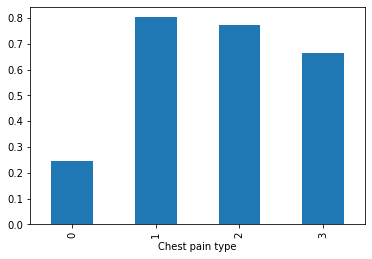

In [79]:
# plot
chestPain['target'].plot.bar(xlabel="Chest pain type")

In this chart we can see a clear distinction between the different types of chest pain and whether or not a person has heart disease. Based on this chart looks like there might be a difference between chest pain type 0 and the rest.

#### exang - Exercise induced angina
With a correlation coefficient of -0.4380

In [54]:
exangina = df.groupby('exang').mean()
exangina

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,thal,target
exang,,,,,,,,,,,,,
0,53.864706,0.650000,1.236765,130.848529,243.525000,0.136765,0.554412,155.342647,0.811471,1.502941,0.675000,2.236765,0.669118
1,55.556522,0.785507,0.362319,133.115942,250.878261,0.173913,0.481159,136.837681,1.584058,1.153623,0.910145,2.495652,0.205797


<AxesSubplot:xlabel='exang'>

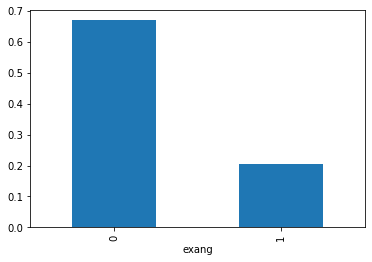

In [55]:
exangina["target"].plot.bar()

Based on this chart there seems to be a strong negative correlation between whether a person gets exercise enduced angina and if they have a heart disease. So it seems to indicate that if a person gets exercise enduces angina, then they have a lower risk of having a heart disease.

#### thalach - Maximum heart rate achieved
With a correlation coefficient of 0.423

In [75]:
maxHR = df.groupby('thalach').mean()
maxHR.head()

,age,sex,cp,trestbps,chol,fbs,restecg,exang,oldpeak,slope,ca,thal,target
thalach,,,,,,,,,,,,,
71,67.000000,1.000000,0.000000,120.0,237.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.0,0.000000
88,57.000000,1.000000,0.000000,152.0,274.000000,0.000000,1.000000,1.000000,1.200000,1.000000,1.000000,3.0,0.000000
90,59.000000,1.000000,0.000000,164.0,176.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.0,0.000000
95,53.000000,1.000000,0.000000,123.0,282.000000,0.000000,1.000000,1.000000,2.000000,1.000000,2.000000,3.0,0.000000
96,62.285714,0.571429,0.857143,120.0,216.857143,0.428571,0.428571,0.571429,1.257143,0.857143,0.571429,2.0,0.428571


<AxesSubplot:xlabel='Max heart rate'>

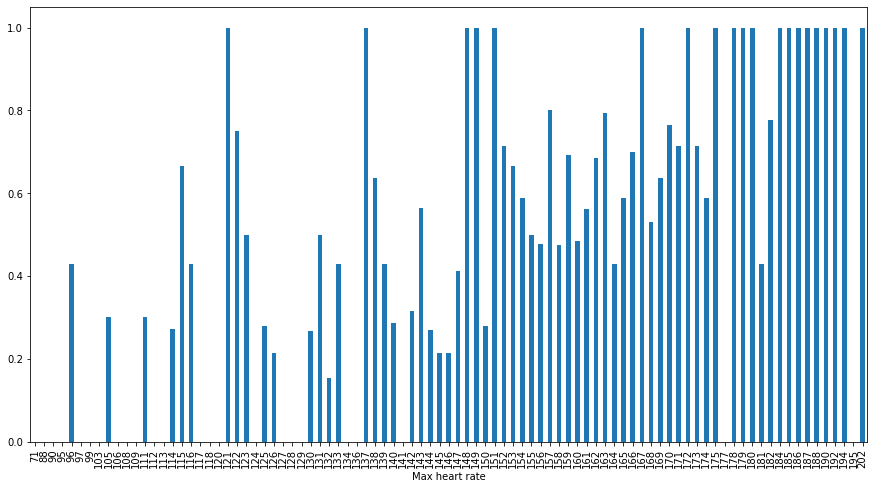

In [74]:
maxHR["target"].plot.bar(xlabel="Max heart rate", figsize=(15,8))

Based on this chart there seems to be a general increase increase in heart disease entries the higher the max heart rate is. So this seems to indicate that the higher your maximum heart rate can go, the more likely you are to have heart disease.

#### oldpeak - ST depression induced by exercise relative to rest
With correlation coefficient -0.4384

In [76]:
st = df.groupby('oldpeak').mean()
st.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,target
oldpeak,,,,,,,,,,,,,
0.0,50.753799,0.662614,1.079027,128.911854,240.431611,0.121581,0.562310,162.188450,0.185410,1.832827,0.550152,2.136778,0.735562
0.1,55.869565,0.869565,0.652174,121.391304,222.869565,0.391304,0.434783,145.695652,0.304348,1.608696,1.391304,2.434783,0.521739
0.2,56.567568,0.513514,1.216216,135.378378,254.918919,0.162162,0.648649,149.027027,0.324324,1.405405,0.405405,2.513514,0.729730
0.3,56.100000,0.400000,1.000000,116.800000,243.900000,0.000000,1.000000,143.700000,0.000000,1.700000,0.900000,2.400000,0.600000
0.4,58.133333,0.800000,0.966667,129.733333,241.266667,0.000000,0.533333,151.100000,0.100000,1.300000,0.866667,2.400000,0.866667


<AxesSubplot:xlabel='ST depression induced by exercise relative to rest'>

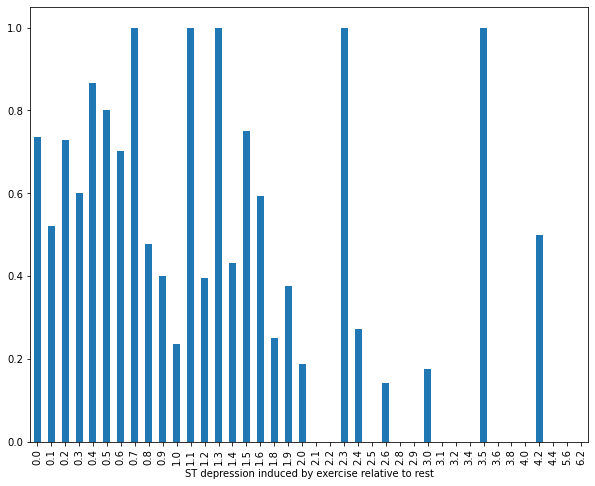

In [80]:
st["target"].plot.bar(xlabel="ST depression induced by exercise relative to rest", figsize=(10,8))

On this graph we see a drop in cases with heart disease the higher the value of ST depression. This seems to indicate that people with higher levels of ST depression have a lower chance of having a heart disease.